In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

%matplotlib inline

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [2]:
def limit(a):
    b = np.array(a, dtype=float)
    min_ = 1e-8
    b[b==0] = min_
    b[b==1] = 1 - min_
    
    return b

In [3]:
def calc_logloss(y, y_pred):
    y_pred = limit(y_pred) 
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [4]:
y1 = np.array([1, 0])
y_pred1 = np.array([0, 1])
calc_logloss(y1, y_pred1)

18.420680741439988

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [5]:
def calc_std_feat(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

In [65]:
classes = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=1)

In [66]:
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuf, y_shuf = classes[0][shuffle_index], classes[1][shuffle_index]

In [67]:
X_scalered = calc_std_feat(X_shuf)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scalered, y_shuf, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 2), (300, 2), (700,), (300,))

In [69]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [70]:
def log_model(X, y, alpha, max_iter, min_weight_dist):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    distance = 1
    iter_num = 1    
    y_pred = sigmoid(X.dot(W))
    err = calc_logloss(y, y_pred)
    losses = [err]
    
    while distance > min_weight_dist and iter_num < max_iter:
        W -= alpha * 1/n * X.T.dot(y_pred - y)
        y_pred = sigmoid(X.dot(W))
        err1 = calc_logloss(y, y_pred)
        err1 = np.squeeze(err1)
        distance = np.abs(err - err1)
        err = err1
        losses.append(err)
        iter_num+=1
        
    return W, losses

In [71]:
W, losses = log_model(X_train, y_train,
              alpha = 1e-2,
              max_iter = 1e4,
              min_weight_dist = 1e-7)
W

array([2.80823104, 0.23608449])

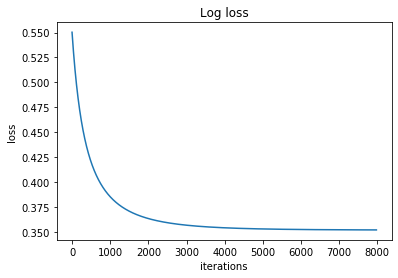

In [72]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [73]:
def calc_pred_proba_1(X, W):
    y_proba = sigmoid(X.dot(W))
    return y_proba[y_proba > 0.5]

In [74]:
calc_pred_proba_1(X_train, W)

array([0.72428365, 0.83980559, 0.6783925 , 0.68498377, 0.84320632,
       0.67642771, 0.87810024, 0.95033043, 0.8525313 , 0.9335683 ,
       0.63701402, 0.9406585 , 0.62106138, 0.81436059, 0.60743387,
       0.58961536, 0.72115845, 0.92358334, 0.68461239, 0.99337284,
       0.73931487, 0.73779557, 0.99076023, 0.94973439, 0.60343644,
       0.99006454, 0.99867348, 0.72788559, 0.57594653, 0.72139156,
       0.84795221, 0.79962617, 0.97197948, 0.82182483, 0.8379744 ,
       0.91158029, 0.87480843, 0.967765  , 0.76621459, 0.85979463,
       0.66950688, 0.52162015, 0.97217393, 0.78541854, 0.99729543,
       0.99080906, 0.95046234, 0.70102722, 0.6199281 , 0.54196171,
       0.99883406, 0.98053729, 0.71238688, 0.98538003, 0.51259147,
       0.83096798, 0.84994227, 0.82468726, 0.95050888, 0.93534099,
       0.82360012, 0.89931067, 0.52880221, 0.87199698, 0.74046541,
       0.78981884, 0.99936608, 0.79872362, 0.80498741, 0.98206158,
       0.65311396, 0.95810656, 0.83200225, 0.84532572, 0.60804

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred)

In [75]:
def calc_pred(X, W):
    y = sigmoid(X.dot(W))
    class_predict = np.where(y > 0.5, 1, 0)
    return class_predict

In [76]:
y_pred_train = calc_pred(X_train, W)
y_pred_test = calc_pred(X_test, W)
y_pred_train

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [77]:
def y_frame(y,y_pred):
    df = pd.DataFrame(np.vstack((y,y_pred)).T,
                        columns = ['y', 'y_pred'])
    return df

In [78]:
df_train = y_frame(y_train,y_pred_train)
df_test = y_frame(y_test,y_pred_test)

In [79]:
def results(df):
    TP = len(df.loc[(df['y'] == df['y_pred'])&(df['y_pred']==1)])
    TN = len(df.loc[(df['y'] == df['y_pred'])&(df['y_pred']==0)])
    FP = len(df.loc[(df['y'] != df['y_pred'])&(df['y_pred']==1)])
    FN = len(df.loc[(df['y'] != df['y_pred'])&(df['y_pred']==0)])
    
    print(f'TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}')
    print(f'accuracy: {(TP + TN)/(TP + TN + FP + FN)}')
    print(f'precision: {TP / (TP + FP)}')
    print(f'recall: {TP / (TP + FN)}')
    print(f'F: {2 * precision * recall / (precision + recall)}')

In [80]:
results(df_train)

TP: 291, TN: 307, FP: 52, FN: 50
accuracy: 0.8542857142857143
precision: 0.8483965014577259
recall: 0.8533724340175953
F: 0.9705882352941176


In [81]:
results(df_test)

TP: 146, TN: 103, FP: 37, FN: 14
accuracy: 0.83
precision: 0.7978142076502732
recall: 0.9125
F: 0.9705882352941176


6. Могла ли модель переобучиться? Почему?

Нет, потому что функция потерь линейная.

7. (опция) Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [84]:
def log_model_l1(X, y, alpha, max_iter, min_weight_dist, eta):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    distance = 1
    iter_num = 1    
    y_pred = sigmoid(X.dot(W))
    err = calc_logloss(y, y_pred)
    losses = [err]
    
    while distance > min_weight_dist and iter_num < max_iter:
        W -= alpha * (1/n * X.T.dot(y_pred - y) + eta * np.sign(W))
        y_pred = sigmoid(X.dot(W))
        err1 = calc_logloss(y, y_pred)
        err1 = np.squeeze(err1)
        distance = np.abs(err - err1)
        err = err1
        losses.append(err)
        iter_num+=1
        
    return W, losses

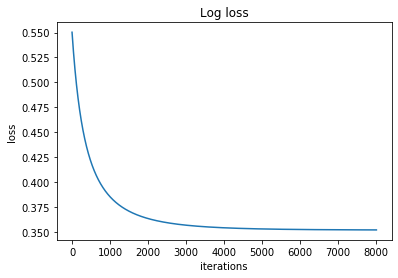

In [85]:
W, losses = log_model_l1(X_train, y_train,
                         alpha = 1e-2,
                         max_iter = 1e4,
                         min_weight_dist = 1e-7,
                         eta = 1e-4)

plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)

In [86]:
def log_model_l2(X, y, alpha, max_iter, min_weight_dist, eta):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    distance = 1
    iter_num = 1    
    y_pred = sigmoid(X.dot(W))
    err = calc_logloss(y, y_pred)
    losses = [err]
    
    while distance > min_weight_dist and iter_num < max_iter:
        W -= alpha * (1/n * X.T.dot(y_pred - y) + eta * W)
        y_pred = sigmoid(X.dot(W))
        err1 = calc_logloss(y, y_pred)
        err1 = np.squeeze(err1)
        distance = np.abs(err - err1)
        err = err1
        losses.append(err)
        iter_num+=1
        
    return W, losses

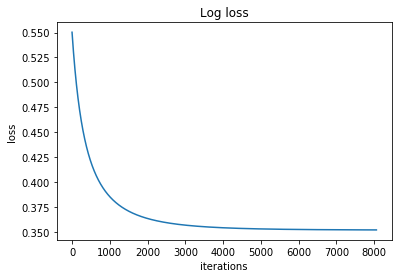

In [87]:
W, losses = log_model_l2(X_train, y_train,
                         alpha = 1e-2,
                         max_iter = 1e4,
                         min_weight_dist = 1e-7,
                         eta = 1e-4)

plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)